In [2]:
import numpy as np
import scipy as sp
from math import pi, tanh
from cmath import sqrt
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
from ipywidgets import interact

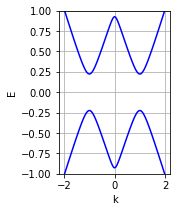

-1.0 [-1.97214575e+00+4.07660017e-17j  1.97214575e+00-3.75133952e-17j
  3.04292250e-17+9.67412475e-02j  7.21721388e-17-9.67412475e-02j] [0 2]
-0.9797979797979798 [-1.95138073e+00-1.90819582e-17j  1.95138073e+00+2.27258940e-16j
 -1.72535886e-16+8.87614775e-02j -4.25841555e-17-8.87614775e-02j] [0 2]
-0.9595959595959596 [-1.93059158e+00+5.55111512e-17j  1.93059158e+00-2.06726861e-16j
  2.22975549e-17+7.43979255e-02j  9.78771686e-17-7.43979255e-02j] [0 2]
-0.9393939393939394 [-1.90977668e+00+3.81639165e-17j  1.90977668e+00+6.98734419e-17j
  8.98183660e-17+4.82183813e-02j  6.86779903e-17-4.82183813e-02j] [0 2]
-0.9191919191919192 [-1.88893423+1.73472348e-17j  1.88893423-5.26583443e-17j
  0.0418931 -4.77728529e-17j -0.0418931 +1.30470499e-16j] [0 2]
-0.898989898989899 [-1.8680623 +3.98986399e-17j  1.8680623 -1.33492392e-17j
  0.08190809+1.27109921e-17j -0.08190809-2.72311119e-17j] [0 2]
-0.8787878787878788 [-1.84715872+1.21430643e-17j  1.84715872+7.64362532e-18j
  0.11198633-7.17187469e-18j 

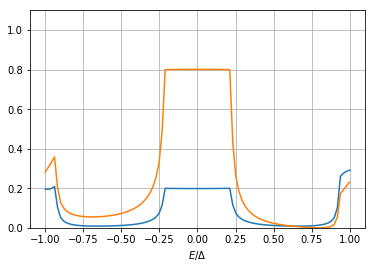

In [6]:
hbar=1
elec=1
D1_r=0.1
D1_i=0.1
D2=1
Vt=0.2

s0=np.array([[1,0],[0,1]])
sx=np.array([[0,1],[1,0]])
sy=np.array([[0,-1j],[1j,0]])
sz=np.array([[1,0],[0,-1]])

Esw=np.linspace(-1,1,100)

k_sw= np.linspace(-1,1,101)*2
Ens= np.zeros((len(k_sw),4))
for i_k in range(len(k_sw)):
    Ham= k_sw[i_k]* np.kron(sz,sz)+ np.kron( D1_r * sy+ D1_i * sx, sz)+\
        D2*np.kron(sx,sy)+ Vt* np.kron(s0,sx)
    Ens[i_k,:], _ = np.linalg.eigh(Ham)
    
plt.figure(figsize=(2,3))
plt.plot(k_sw,Ens,'b')
Emax=np.max(Esw)
plt.ylim(-Emax,Emax)
plt.xlabel('k')
plt.ylabel('E')
plt.grid()
plt.show()

Ree=np.zeros(len(Esw))
Reh=np.zeros(len(Esw))

for i_E in range(len(Esw)):
    E=Esw[i_E]
    Ht= E*np.kron(sz,sz)- 1j* np.kron(D1_r*sx-D1_i*sy,s0) + D2*np.kron(sy,sx)+\
        1j*Vt* np.kron(sz,sy)
    evs, evecs = np.linalg.eig(Ht)
    vk=np.kron(sz,sz)
#     Jmat = np.reshape(np.diag(np.dot(np.transpose(evecs).T,np.dot(vk,evecs))),[4,])
#     else:
#         Jmat = np.reshape(np.diag(np.dot(np.transpose(evecs).conj(),np.dot(sz,evecs))),[2,])
#     i_p=np.where(np.imag(Jmat) > 0)[0]
#     i_n=np.where(np.imag(Jmat) < 0)[0]
#     if len(i_p)==0 and len(i_n)==0:
#         i_p=np.where(np.real(Jmat) > 0)[0]
#         i_n=np.where(np.real(Jmat) <= 0)[0]
#     i_p1= np.where(np.real(evs) > 1e-5)[0] # propagating waves
#     i_p2=np.where(np.imag(evs) < 0)[0]
#     i_p=(i_p1,i_p2)
#     i_n=np.where(np.imag(evs) > 0)[0]

    i_evan= np.where( np.abs(np.imag(evs)) > 1e-5 )[0]
    ie_T= np.where( np.imag(evs[i_evan]) > 0)[0]

    i_prop= np.where( np.abs(np.imag(evs)) < 1e-5 )[0]
#     ip_T= np.where( np.real(evs[i_prop]) > 0)[0]
    Jmat = np.reshape(np.diag(np.dot(np.transpose(evecs).conj(),np.dot(vk,evecs))),[4,])
    ip_T= np.where( np.real(Jmat[i_prop]) > 0)[0]

    i_p=np.concatenate((i_prop[ip_T],i_evan[ie_T]))
    
    
#     if len(i_p)==0 and len(i_n)==0:
#         i_p=np.where(np.real(Jmat) > 0)[0]
#         i_n=np.where(np.real(Jmat) <= 0)[0]        
    print(E, evs, i_p)
    
    evecs= np.dot(evecs,np.diag(1/Jmat**0.5))
#     devecs= 1j*np.dot(evecs,np.diag(evs))
#     Tevecs= np.zeros((len(evs),len(evs)), dtype=np.complex64)
#     Tevecs[:,:len(i_p)] = evecs[:,i_p]
#     Tevecs[:,len(i_p):] = evecs[:,i_n]    
    Tevecs = evecs[:,i_p]
#     dTevecs= np.zeros((len(evs),len(evs)), dtype=np.complex64)
#     dTevecs[:,:len(i_p)] = devecs[:,i_p]
#     dTevecs[:,len(i_p):] = -devecs[:,i_n]    
    
    
    Hl= E*np.kron(sz,sz)
    evs_l, evecs_l = np.linalg.eig(Hl)
    Jmat_l = np.reshape(np.diag(np.dot(np.transpose(evecs_l).conj(),np.dot(vk,evecs_l))),[4,])
#     i_prop = np.where(np.real(evs_l)> 0)[0]
    i_p_l=np.where(np.real(Jmat_l) > 0)[0]
    i_n_l=np.where(np.real(Jmat_l) <= 0)[0]
    evecs_l= np.dot(evecs_l,np.diag(1/(np.abs(Jmat_l)**0.5)))
#     devecs_l= 1j*np.dot(evecs_l,np.diag(evs_l))

#     Revecs_l= np.zeros((len(evs_l),len(evs_l)), dtype=np.complex64)
#     Revecs_l[:,:len(i_p_l)] = evecs_l[:,i_p_l]
#     Revecs_l[:,len(i_p_l):] = evecs_l[:,i_n_l] 
#     print(E, evs_l, i_n_l)
#     Revecs_l = evecs_l[:,i_n_l]
    Revecs_l= np.array([[0,1,0,0],[0,0,1,0]]).T

#     dRevecs_l= np.zeros((len(evs_l),len(evs_l)), dtype=np.complex64)
#     dRevecs_l[:,:len(i_p_l)] = -devecs_l[:,i_p_l]
#     dRevecs_l[:,len(i_p_l):] = devecs_l[:,i_n_l]    

#     Tevecs_l = evecs_l[:,i_p_l]
    Tevecs_l= np.array([1,0,0,0]).T
#     dTevecs_l = devecs_l[:,i_p_l]

    for i_t in range(1):
        Psi_t=np.concatenate((Tevecs,-Revecs_l),axis=1)
        Psi_inc= Tevecs_l
#         Psi_inc= Tevecs_l[:,i_t]
#         print(E, Psi_t.shape, Psi_inc.shape)
        x=sp.linalg.solve(Psi_t,Psi_inc)
        Ree[i_E] += np.abs(x[2])**2
        Reh[i_E] += np.abs(x[3])**2

plt.figure()
plt.plot(Esw,Reh)
plt.plot(Esw,Ree)
# plt.plot(Esw/Delta,np.imag(Reh))
# plt.plot(Esw/Delta,np.imag(Ree))
plt.grid()
plt.ylim(0,1.1)

plt.xlabel(r'$r_{eh}$')
plt.xlabel(r'$E/\Delta$')
plt.show()

# plt.figure()
# # plt.plot(Esw/Delta,np.imag(qe_ex))
# # plt.plot(Esw/Delta,np.imag(q_calc[0,:]).T)
# # plt.plot(Esw/Delta,np.real(we_ex))
# # plt.plot(Esw/Delta,np.real(w_calc[0,:]).T)
# # plt.plot(Esw/Delta,np.abs(dot_prod[0,0,:]))
# # plt.plot(Esw/Delta,dot_prod[0,1,:])
# # plt.plot(Esw/Delta,dot_prod[1,0,:])
# # plt.plot(Esw/Delta,dot_prod[1,1,:])
# plt.plot(Esw/Delta,vec_diff)

# # plt.ylim(0,1)
# plt.grid()
# plt.xlabel(r'$r_{eh}$')
# plt.xlabel(r'$E/\Delta$')
# plt.show()

In [44]:
# print(Ree,Reh)
# print(np.concatenate((ie_T, ip_T)))
print(i_p)

[]
